# 1. Perkenalan Dataset

1. Sumber dataset : Kaggle.com
2. Link dataset : https://www.kaggle.com/datasets/hendratno/covid19-indonesia
3. Penjelasan dataset : Dataset ini merupakan dataset Covid-19 di Indonesia untuk membantu dalam mengambil sebuah keputusan terkait covid-19.

# 2. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from scipy.stats.mstats import winsorize

# 3. Memuat dataset

In [2]:
data_covid = pd.read_csv("/content/drive/MyDrive/Study Independent/Machine Learning - DBS FOUNDATION/9. Machine Learning untuk Pemula/proyek ML /covid_19_indonesia.csv")

In [ ]:
data_covid

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.00,1.00
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00


# 4. Exploratory Data Analysis (EDA)

In [ ]:
# Mengetahui Jumlah baris dan kolom
jumlah_baris, jumlah_kolom = data_covid.shape
print("Jumlah baris adalah ", jumlah_baris)
print("Jumlah kolom adalah ", jumlah_kolom)

Jumlah baris adalah  31822
Jumlah kolom adalah  38


In [ ]:
# Mengetahui nama kolom
data_covid.columns

Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level',
       'City or Regency', 'Province', 'Country', 'Continent', 'Island',
       'Time Zone', 'Special Status', 'Total Regencies', 'Total Cities',
       'Total Districts', 'Total Urban Villages', 'Total Rural Villages',
       'Area (km2)', 'Population', 'Population Density', 'Longitude',
       'Latitude', 'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Total Deaths per 100rb', 'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths'],
      dtype='object')

Keterangan Setiap nama kolom :
1. Date - Tanggal laporan COVID-19 diterbitkan.
2. Location ISO Code - Kode lokasi berdasarkan standar ISO
3. Location - Nama lokasi tempat data dilaporkan
4. New Cases - Jumlah kasus positif baru yang dilaporkan pada hari itu.
5. New Deaths - Jumlah kematian baru akibat COVID-19 yang dilaporkan pada hari itu.
6. New Recovered - Jumlah orang yang sembuh dari COVID-19 pada hari itu.
7. New Active Cases - Perubahan jumlah kasus aktif harians
8. Total Cases - Total akumulasi kasus positif COVID-19 hingga tanggal pelaporan.
9. Total Deaths - Total kematian akibat COVID-19 hingga tanggal pelaporan.
10. Total Recovered - Total kesembuhan dari COVID-19 hingga tanggal pelaporan.
11. Total Active Cases - Jumlah kasus positif yang masih aktif hingga tanggal pelaporan.
12. Location Level - Tingkat wilayah dari lokasi pelaporan, bisa berupa provinsi atau negara.
13. City or Regency - Nama kota atau kabupaten tempat data dilaporkan.
14. Province - Nama provinsi tempat data dilaporkan.
15. Country - Nama negara tempat data dilaporkan.
16. Continent - Nama benua tempat data dilaporkan.
17. Island - Nama pulau tempat data dilaporkan.
18. Time Zone - Zona waktu lokasi tempat data dilaporkan.
19. Special Status - Status khusus dari lokasi (misalnya daerah otonomi khusus atau karantina).
20. Total Regencies - Jumlah kabupaten di lokasi tersebut.
21. Total Cities - Jumlah kota di lokasi tersebut.
22. Total Districts - Jumlah distrik atau kecamatan di lokasi tersebut.
23. Total Urban Villages - Jumlah kelurahan di lokasi tersebut.
24. Total Rural Villages - Jumlah desa di lokasi tersebut.
25. Area (km²) - Luas wilayah lokasi dalam kilometer persegi.
26. Population - Jumlah populasi di lokasi tersebut.
27. Population Density - Kepadatan penduduk di lokasi tersebut:
Population Density= Area/Population
28. Longitude - Bujur geografis lokasi (koordinat).
29. Latitude - Lintang geografis lokasi (koordinat).
30. New Cases per Million - Jumlah kasus positif baru per 1 juta penduduk
31. Total Deaths per Million - Total kematian per 1 juta penduduk
32. New Deaths per Million - Kematian baru per 1 juta penduduk
33. Total Death per 100rb - Proporsi kematian dari total kasus dalam persentase
34. Case Fatality Rate (CFR) - Tingkat kematian kasus, proporsi kematian dari
35. Case Recovered Rate - Rasio kesembuhan harian. Di bawah 1 artinya menurun, 1 artinya stabil, di atas 1 artinya meningkat
36. Growth Factor of New Cases - Faktor pertumbuhan kasus baru. Di bawah 1 berarti menurun, 1 berarti stabil
37 Growth Factor of New Deaths - Faktor pertumbuhan kematian baru. Di bawah 1 berarti menurun, 1 berarti stabil, di atas 1 berarti meningkat

Terdapat Fitur (Kolom) yang tidak akan dieksplorasi dan dianalisis ditahap selanjutnya karena fitur tersebut sudah diwakilkan dengan fitur lainnya. Fitur tersebut yaitu:
Date, Location ISO code, Location Level, Country, Time Zone, Special Status, Total Regencies, Total Cities, Total Districts, Total Urban Villages, Total Rural Villages, Area (km2), Population Density, Longitude, Latitude, Total Death per 100rb, Continent



> `Fitur yang dihasilkan dari proses perhitungan yang dari fitur laiinnya` yaitu News Cases Per Million, Total Cases per Million, New Death Permillion, Total Death per million, Total Death per 100rb, Growth Factor of New Cases, Growth Factor of New Death



In [ ]:
# Daftar kolom yang ingin dihilangkan
kolom_dihilangkan = ['Date', 'Location ISO Code', 'Location Level', 'Country', 'Time Zone', 'Special Status',
                     'Total Regencies', 'Total Cities', 'Total Districts', 'Total Urban Villages', 'Total Rural Villages',
                     'Area (km2)', 'Population Density', 'Longitude', 'Latitude', 'Total Deaths per 100rb', "Continent", "City or Regency"]

# Membuat daftar kolom yang ingin dipertahankan
kolom_eda = [kolom for kolom in data_covid.columns if kolom not in kolom_dihilangkan]

# Membuat DataFrame baru data_covid_eda
data_covid_eda = data_covid[kolom_eda].copy() #.copy() untuk menghindari SettingWithCopyWarning

data_covid_eda

,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Province,Island,Population,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,DKI Jakarta,2,0,0,2,39,20,75,-56,DKI Jakarta,Jawa,10846145,0.18,3.60,0.0,1.84,51.28%,192.31%,NaN,NaN
1,DKI Jakarta,2,0,0,2,41,20,75,-54,DKI Jakarta,Jawa,10846145,0.18,3.78,0.0,1.84,48.78%,182.93%,1.00,1.00
2,Indonesia,2,0,0,2,2,0,0,2,NaN,NaN,265185520,0.01,0.01,0.0,0.00,0.00%,0.00%,NaN,NaN
3,Riau,1,0,0,1,1,0,1,0,Riau,Sumatera,6074100,0.16,0.16,0.0,0.00,0.00%,100.00%,NaN,NaN
4,DKI Jakarta,2,0,0,2,43,20,75,-52,DKI Jakarta,Jawa,10846145,0.18,3.96,0.0,1.84,46.51%,174.42%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,Sulawesi Utara,37,0,0,37,52770,1213,50997,560,Sulawesi Utara,Sulawesi,2641884,14.01,19974.38,0.0,459.14,2.30%,96.64%,2.85,1.00
31818,Sumatera Barat,13,0,3,10,104640,2371,102066,203,Sumatera Barat,Sumatera,5519245,2.36,18959.11,0.0,429.59,2.27%,97.54%,6.50,1.00
31819,Sumatera Selatan,16,0,1,15,82198,3376,78510,312,Sumatera Selatan,Sumatera,8217551,1.95,10002.74,0.0,410.83,4.11%,95.51%,3.20,1.00
31820,Sumatera Utara,50,0,5,45,158866,3288,154924,654,Sumatera Utara,Sumatera,14874889,3.36,10680.15,0.0,221.04,2.07%,97.52%,1.92,1.00


In [ ]:
# Mengetahui Tipe data
data_covid_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Location                     31822 non-null  object 
 1   New Cases                    31822 non-null  int64  
 2   New Deaths                   31822 non-null  int64  
 3   New Recovered                31822 non-null  int64  
 4   New Active Cases             31822 non-null  int64  
 5   Total Cases                  31822 non-null  int64  
 6   Total Deaths                 31822 non-null  int64  
 7   Total Recovered              31822 non-null  int64  
 8   Total Active Cases           31822 non-null  int64  
 9   Province                     30893 non-null  object 
 10  Island                       30893 non-null  object 
 11  Population                   31822 non-null  int64  
 12  New Cases per Million        31822 non-null  float64
 13  Total Cases per 

In [ ]:
# Mengetahui Missing Value
data_covid_eda.isnull().sum()

,0
Location,0
New Cases,0
New Deaths,0
New Recovered,0
New Active Cases,0
Total Cases,0
Total Deaths,0
Total Recovered,0
Total Active Cases,0
Province,929


In [ ]:
# Mengetahui data yang duplikat
data_covid_eda.duplicated().sum()

np.int64(883)

`Melihat distribusi pada kolom bertipe data numerik`

In [ ]:
data_covid_eda.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Population,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Growth Factor of New Cases,Growth Factor of New Deaths
count,31822.000000,31822.000000,31822.000000,31822.000000,3.182200e+04,31822.000000,3.182200e+04,31822.000000,3.182200e+04,31822.000000,31822.000000,31822.000000,31822.000000,29883.000000,28375.000000
mean,402.311388,9.920652,390.398498,1.992238,1.594500e+05,4564.753221,1.492615e+05,5623.782415,1.536766e+07,28.133292,11485.038800,0.640308,289.633640,1.326795,1.033834
std,2320.629838,64.139080,2199.878802,1219.513355,6.264435e+05,17693.731369,5.958536e+05,28537.412305,4.461714e+07,74.309710,16477.385479,1.933016,363.428724,2.679379,1.351755
min,0.000000,0.000000,0.000000,-29938.000000,1.000000e+00,0.000000,0.000000e+00,-2343.000000,6.484070e+05,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,-12.000000,5.223250e+03,128.000000,3.913500e+03,80.000000,1.999539e+06,0.830000,1291.367500,0.000000,38.862500,0.650000,0.750000
50%,27.000000,0.000000,20.000000,0.000000,2.359650e+04,565.500000,2.102750e+04,557.000000,4.216171e+06,5.710000,6804.285000,0.000000,158.415000,1.000000,1.000000
75%,130.000000,3.000000,123.000000,19.000000,6.992775e+04,2189.000000,6.414200e+04,2279.000000,9.095591e+06,22.290000,14557.360000,0.540000,389.910000,1.310000,1.000000
max,64718.000000,2069.000000,61361.000000,39165.000000,6.405044e+06,157876.000000,6.218708e+06,586113.000000,2.651855e+08,1459.040000,130231.620000,63.800000,1632.600000,175.000000,134.500000


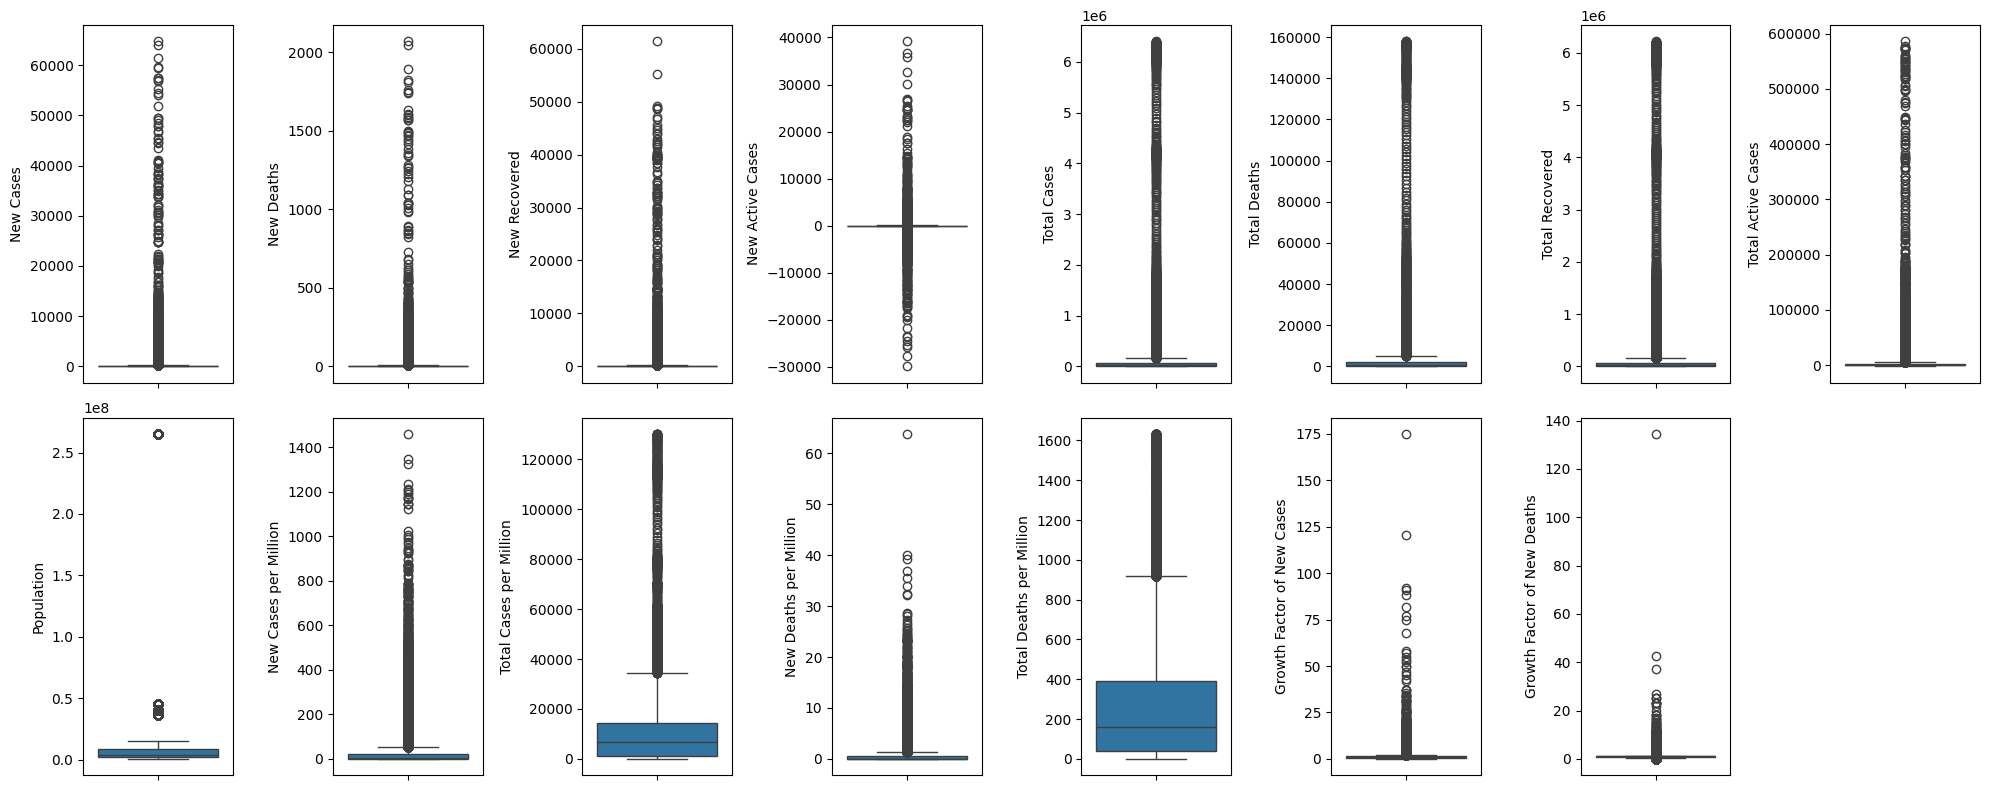

In [ ]:
# Melihat outliers
kolom_numerik_eda = data_covid_eda.select_dtypes(include='number').columns
# Buat grid
num_cols = len(kolom_numerik_eda)
num_rows = math.ceil(num_cols / 8)
# Visualisasi
plt.figure(figsize=(20, 4 * num_rows))
for i, column in enumerate(kolom_numerik_eda):
    plt.subplot(num_rows, 8, i + 1)
    sns.boxplot(y=data_covid_eda[column])
plt.tight_layout()
plt.show()

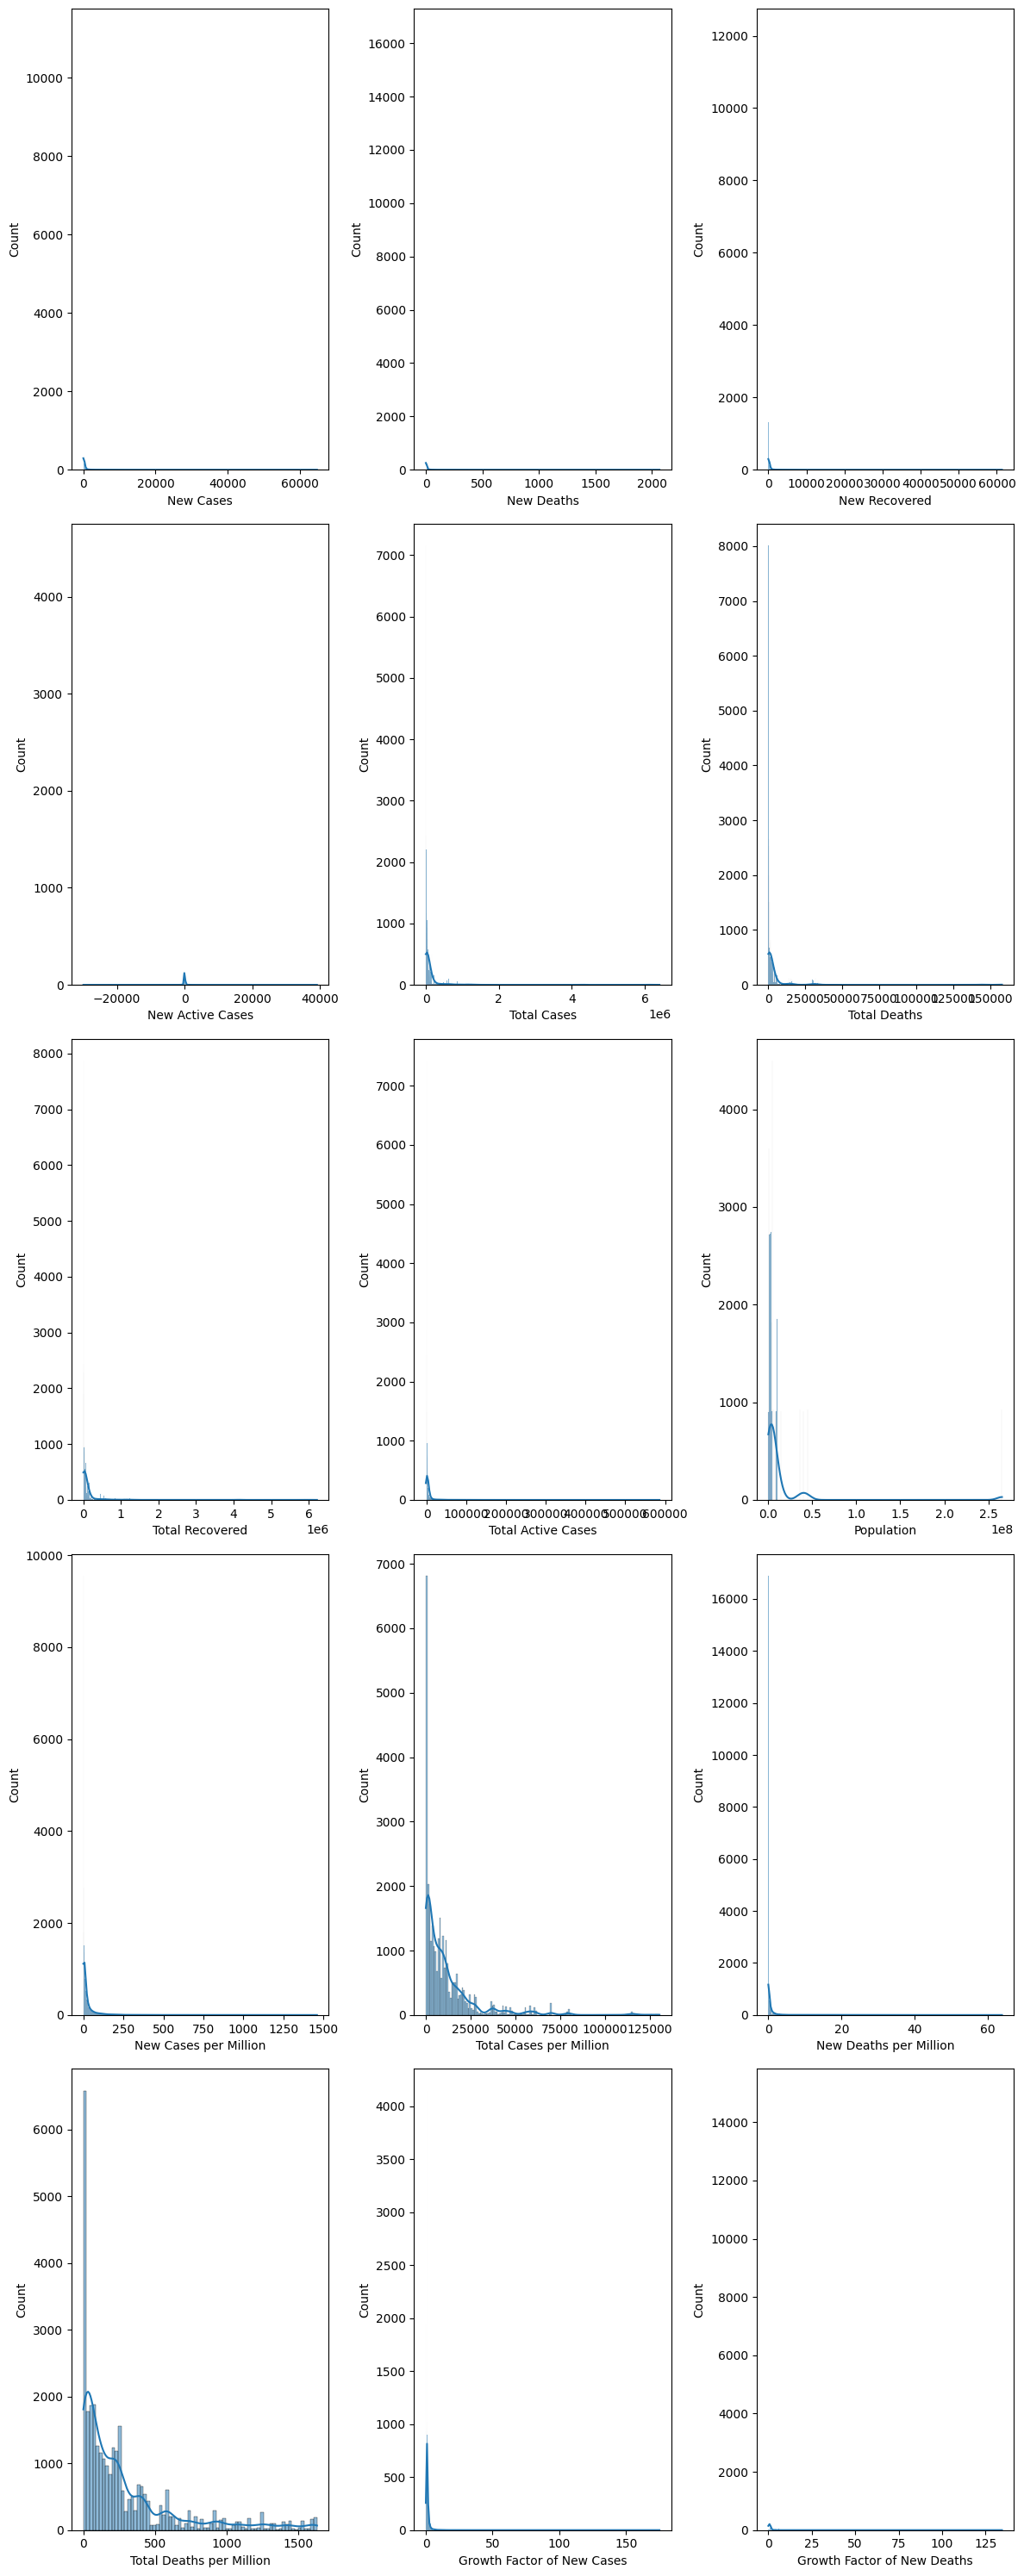

In [ ]:
# Melihat persebaran data
num_cols_numeric = len(kolom_numerik_eda)
num_rows_numeric = math.ceil(num_cols_numeric / 3)

plt.figure(figsize=(12, 6 * num_rows_numeric))

for i, column in enumerate(kolom_numerik_eda):
    plt.subplot(num_rows_numeric, 3, i + 1)
    sns.histplot(data=data_covid_eda, x=column, kde=True)

plt.tight_layout()
plt.show()

- Pada Kolom Numerik, hampir semua kolom tidak berdistribusi normal
- Semua kolom numerik mempunyai nilai Standard Deviasi < Mean, maka semua kolom memiliki value yang sangat bervariasi
- Kolom-kolom numerik adalah kolom yang imbalanced

`Melihat distribusi pada kolom bertipe data kategorikal`

<ipython-input-50-b8bb0708e078>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data_covid_eda[col], order=data_covid_eda[col].value_counts().index, palette='viridis')
<ipython-input-50-b8bb0708e078>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data_covid_eda[col], order=data_covid_eda[col].value_counts().index, palette='viridis')
<ipython-input-50-b8bb0708e078>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data_covid_eda[col], order=data_covid_eda[col].value_counts().index, palette='viridis')
<ipython-input-50-b8bb0708e0

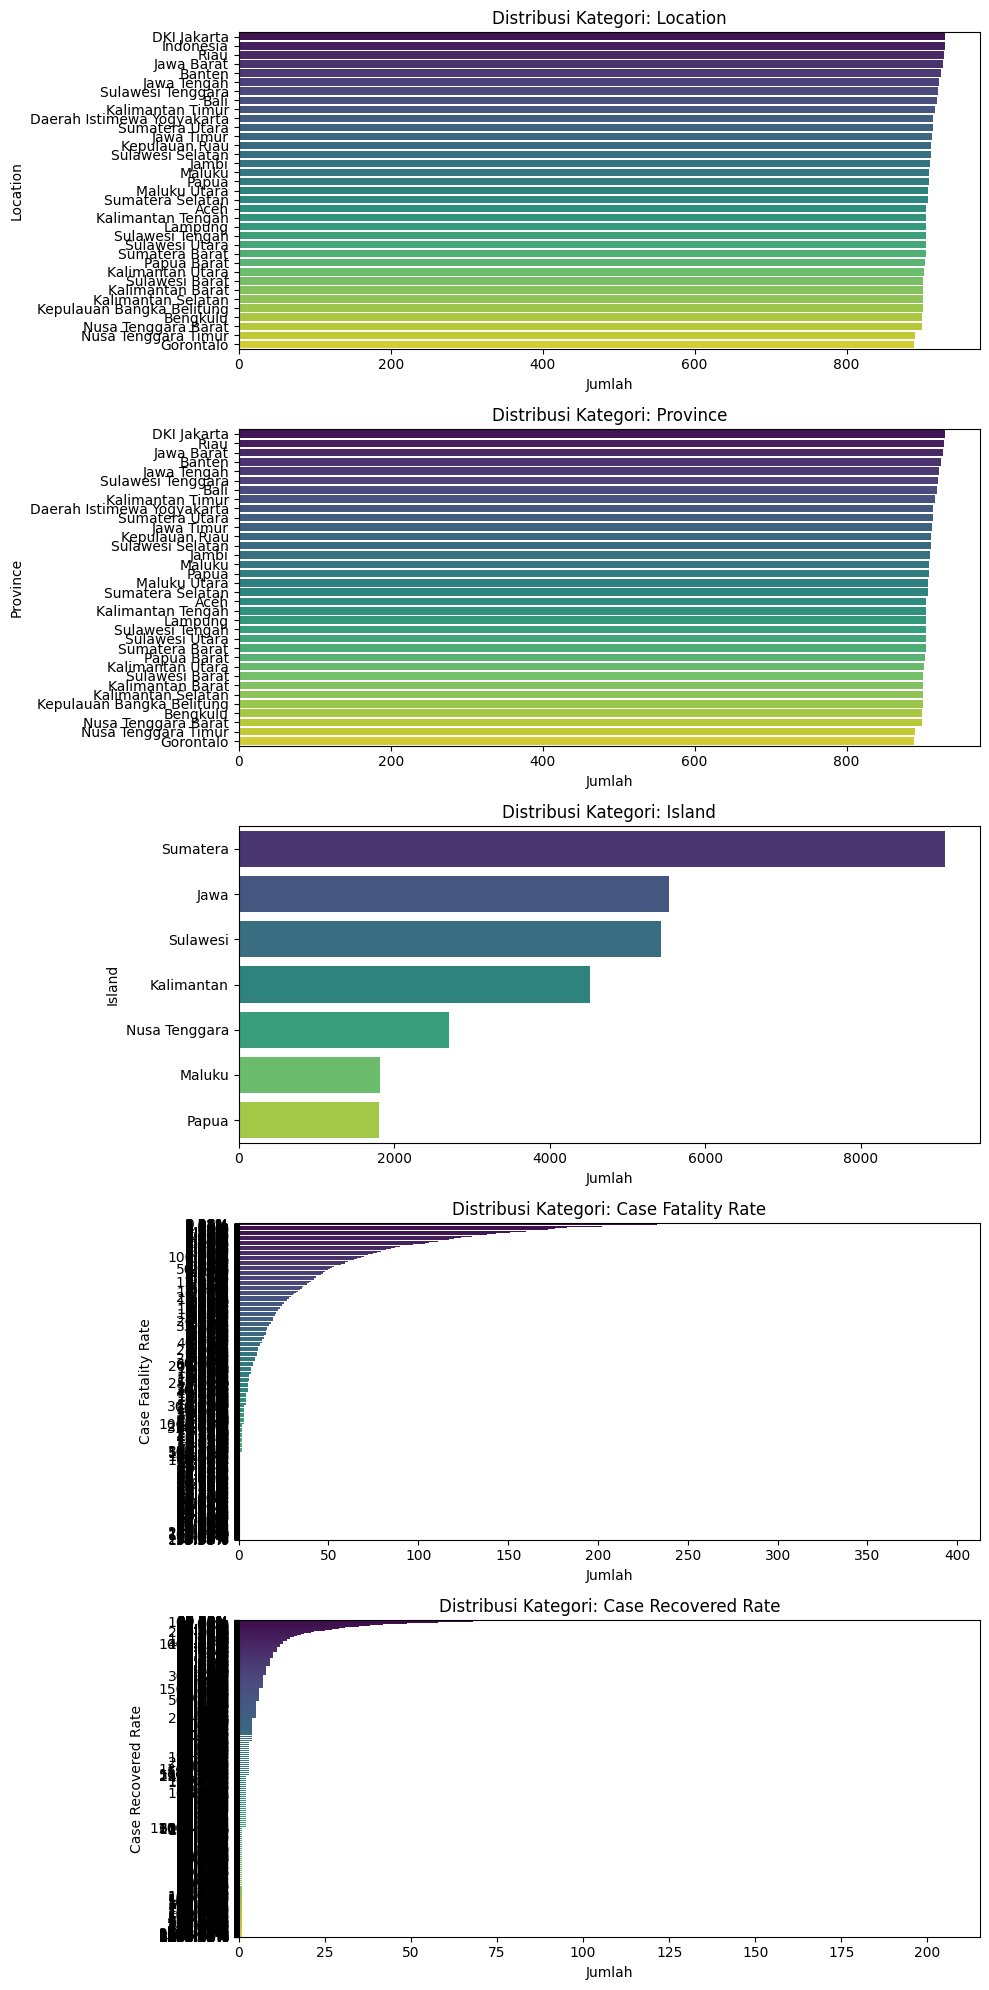

In [ ]:
# Melihat distribusi data pada kolom bertipe data kategorikal
categorical_columns = data_covid_eda.select_dtypes(include='object').columns

plt.figure(figsize=(10, len(categorical_columns) * 4))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.countplot(y=data_covid_eda[col], order=data_covid_eda[col].value_counts().index, palette='viridis')
    plt.title(f'Distribusi Kategori: {col}')
    plt.xlabel('Jumlah')

plt.tight_layout()
plt.show()

In [ ]:
for column in categorical_columns:
    unique_values = data_covid_eda[column].unique()
    print(f"Kolom: {column}")
    print(f"Jumlah Unique Values: {len(unique_values)}")
    print(f"Unique Values: {unique_values[:10]}")  # Menampilkan 10 nilai unik pertama
    print("-" * 50)


Kolom: Location
Jumlah Unique Values: 35
Unique Values: ['DKI Jakarta' 'Indonesia' 'Riau' 'Jawa Barat' 'Banten' 'Jawa Tengah'
 'Sulawesi Tenggara' 'Bali' 'Kalimantan Timur'
 'Daerah Istimewa Yogyakarta']
--------------------------------------------------
Kolom: Province
Jumlah Unique Values: 35
Unique Values: ['DKI Jakarta' nan 'Riau' 'Jawa Barat' 'Banten' 'Jawa Tengah'
 'Sulawesi Tenggara' 'Bali' 'Kalimantan Timur'
 'Daerah Istimewa Yogyakarta']
--------------------------------------------------
Kolom: Island
Jumlah Unique Values: 8
Unique Values: ['Jawa' nan 'Sumatera' 'Sulawesi' 'Nusa Tenggara' 'Kalimantan' 'Maluku'
 'Papua']
--------------------------------------------------
Kolom: Case Fatality Rate
Jumlah Unique Values: 1328
Unique Values: ['51.28%' '48.78%' '0.00%' '46.51%' '100.00%' '44.44%' '50.00%' '46.67%'
 '33.33%' '500.00%']
--------------------------------------------------
Kolom: Case Recovered Rate
Jumlah Unique Values: 6170
Unique Values: ['192.31%' '182.93%' '0.00%' '

- Kolom-kolom kategorikal didominasi oleh data yang tidak balance
- Pada kolom location merupakan nama nama provinsi yang sama seperti kolom Province, namun bedanya pada kolom location ada value "Indonesia", indonesia bukan provinsi
- Pada kolom Case Fatality Rate dan Case Recovered Rate, value bernilai angka dalam bentuk persen

`Analisi Korelasi dengan Heatmap`

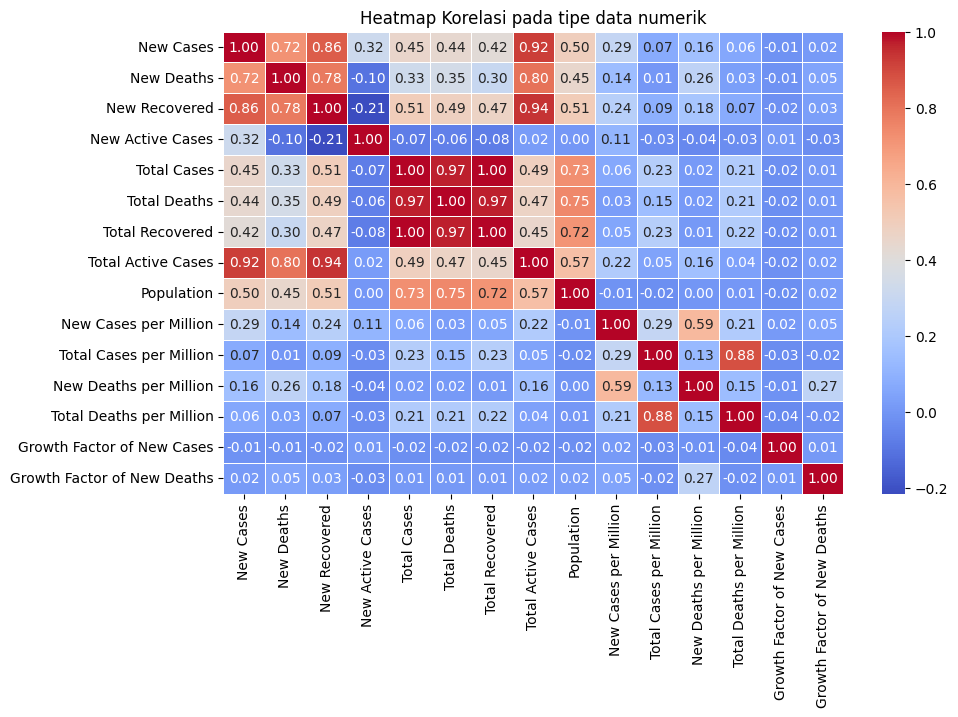

In [ ]:
kolom_numerik = data_covid_eda.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(kolom_numerik.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi pada tipe data numerik")
plt.show()

<ipython-input-59-55cd1fc9f290>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_counts.values, y=feature_counts.index, palette="coolwarm")


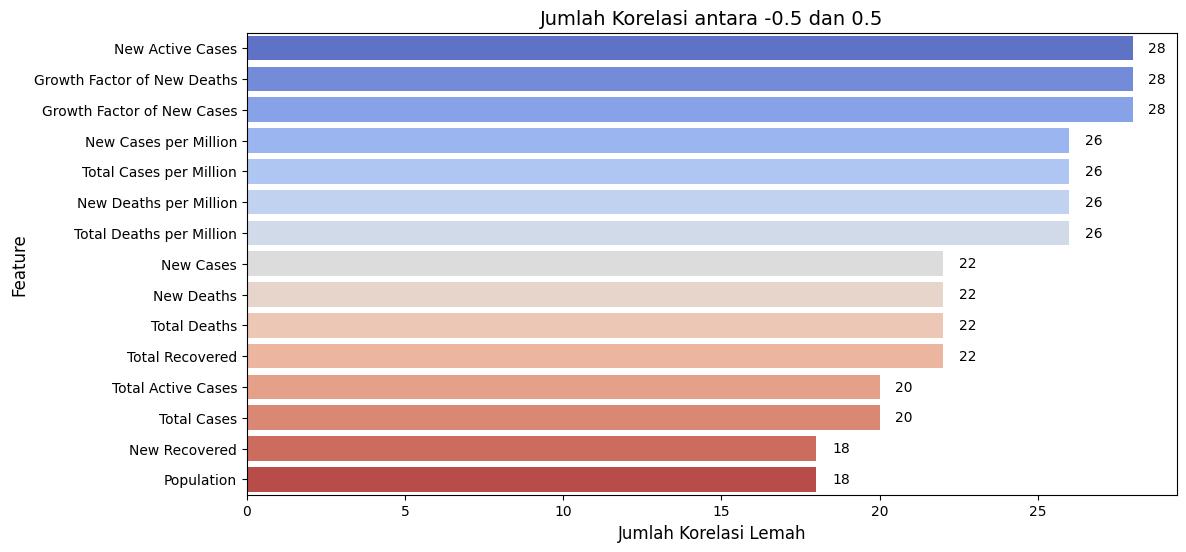

In [ ]:
# Menghtung matriks korelasi antara -0.5 dan 0.5
kolom_numerik_eda = data_covid_eda.select_dtypes(include='number')
corr_matrix = kolom_numerik_eda.corr()
weak_corr = corr_matrix[(corr_matrix > -0.5) & (corr_matrix < 0.5)]
weak_corr_pairs = weak_corr.stack().reset_index()
weak_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
weak_corr_pairs = weak_corr_pairs[weak_corr_pairs['Feature 1'] != weak_corr_pairs['Feature 2']]

# Gabungkan Feature dan menghitung jumlah feature
all_features = pd.concat([weak_corr_pairs['Feature 1'], weak_corr_pairs['Feature 2']])
feature_counts = all_features.value_counts()

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_counts.values, y=feature_counts.index, palette="coolwarm")
plt.title("Jumlah Korelasi antara -0.5 dan 0.5", fontsize=14)
plt.xlabel("Jumlah Korelasi Lemah", fontsize=12)
plt.ylabel("Feature", fontsize=12)
for index, value in enumerate(feature_counts.values):
    plt.text(value + 0.5, index, str(value), va='center', fontsize=10)
plt.show()

Dari hasil heatmap dan barchart mengenai Jumlah korelasi antara -0.5 dan 0.5 bahwa:
- Terdapat 8 Feature yang paling banyak mendapatkan korelasi sangat lemah dengan feature lainnya, karena korelasi nya adalah mendekati 0.
- 8 feature tersebut merupakan feature yang dibuat berdasarkan feature lainnya. Misalnya, feature 'Total Death per 100rb' menjelaskan nilai kematian dari total kasus yang ada. Fitur-fitur ini dibuat untuk memberikan wawasan tambahan.

# 5. Data Preprocessing

In [3]:
# Menghapus Kolom yang tidak perlu digunakan
kolom_dihapus = ['Date', 'Location ISO Code', 'Location Level', 'Country', 'Time Zone', 'Special Status',
                   'Total Regencies', 'Total Cities', 'Total Districts', 'Total Urban Villages', 'Total Rural Villages',
                   'Area (km2)', 'Population Density', 'Longitude', 'Latitude', 'Total Deaths per 100rb',
                   "Continent", "City or Regency","Location"]
data_covid = data_covid.drop(columns=kolom_dihapus)

In [4]:
# Menghapus Missing Value
data_covid = data_covid.dropna()

In [5]:
# Menghapus duplikat
data_covid = data_covid.drop_duplicates()

In [6]:
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data

kolom_outliers = [
    "New Cases", "New Deaths", "New Recovered", "New Active Cases",
    "Total Cases", "Total Deaths", "Total Recovered", "Total Active Cases",
    "Population", "New Cases per Million", "Total Cases per Million",
    "New Deaths per Million", "Total Deaths per Million",
    "Growth Factor of New Cases", "Growth Factor of New Deaths"
]

for col in kolom_outliers:
    data_covid = handle_outliers_iqr(data_covid, col)

In [7]:
print(data_covid)

       New Cases  New Deaths  New Recovered  New Active Cases  Total Cases  \
1            2.0         0.0            0.0               2.0         41.0   
4            2.0         0.0            0.0               2.0         43.0   
7            0.0         0.0            0.0               0.0          1.0   
8            2.0         0.0            0.0               2.0         45.0   
10           1.0         0.0            0.0               1.0          2.0   
...          ...         ...            ...               ...          ...   
31815       12.0         0.0            0.0              12.0      61099.0   
31817       37.0         0.0            0.0              37.0      52770.0   
31818       13.0         0.0            3.0              10.0     104640.0   
31819       16.0         0.0            1.0              15.0      82198.0   
31820       50.0         0.0            5.0              45.0     158866.0   

       Total Deaths  Total Recovered  Total Active Cases       

In [8]:
# Label Encoding pada kolom Island
label_encoder = LabelEncoder()
data_covid['Island'] = label_encoder.fit_transform(data_covid['Island'])

# Menampilkan hasil encoding
print(data_covid[['Island']].head())

    Island
1        0
4        0
7        6
8        0
10       0


In [9]:
data_covid["Island"].unique()

array([0, 6, 5, 3, 1, 2, 4])

In [10]:
# Hapus Kolom Provinsi karena sudah kerucutkan oleh kolom Island
data_covid.drop(columns=['Province'], inplace=True)

In [11]:
# Mengubah nilai pada kolom Case Fatality Race dan Case Recovered Rate menjadi nilai desimal dan menggal tipe data menjadi numerikal
data_covid['Case Fatality Rate'] = data_covid['Case Fatality Rate'].str.rstrip('%').astype(float) / 100
data_covid['Case Recovered Rate'] = data_covid['Case Recovered Rate'].str.rstrip('%').astype(float) / 100

In [12]:
# Standardisasi
scaler = StandardScaler()
covid_scaled = scaler.fit_transform(data_covid)
covid_scaled = pd.DataFrame(covid_scaled, columns=data_covid.columns)


In [13]:
# Hasil setelah data preprocessing
covid_scaled

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Island,Population,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,-0.759029,-0.659991,-0.748038,-0.010171,-0.891369,-0.829941,-0.869375,-0.837918,-1.385253,0.855342,-0.787808,-0.956170,-0.670406,-0.934151,3.544134,0.811428,-0.038940,0.296476
1,-0.759029,-0.659991,-0.748038,-0.010171,-0.891334,-0.829941,-0.869375,-0.836934,-1.385253,0.855342,-0.787808,-0.956153,-0.670406,-0.934151,3.365359,0.740072,-0.038940,0.296476
2,-0.774954,-0.659991,-0.748038,-0.056071,-0.892084,-0.841479,-0.870771,-0.811359,1.129774,-0.034355,-0.795978,-0.956515,-0.670406,-0.940613,-0.297557,0.116062,-1.600229,0.296476
3,-0.759029,-0.659991,-0.748038,-0.010171,-0.891298,-0.829941,-0.869375,-0.835951,-1.385253,0.855342,-0.787808,-0.956135,-0.670406,-0.934151,3.202335,0.675088,-0.038940,0.296476
4,-0.766991,-0.659991,-0.748038,-0.033121,-0.892066,-0.840903,-0.869658,-0.840377,-1.385253,2.353829,-0.795070,-0.956526,-0.670406,-0.940543,3.640216,24.432485,-0.038940,-1.802941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24875,-0.679402,-0.659991,-0.748038,0.219327,0.199761,0.158291,0.247907,-0.767095,0.710603,-0.615772,-0.611717,1.011140,-0.670406,1.118606,-0.073891,0.091075,2.060993,0.296476
24876,-0.480337,-0.659991,-0.748038,0.793073,0.050919,-0.141698,0.091660,-0.535935,0.710603,-0.674255,-0.160144,0.944689,-0.670406,0.671854,-0.116419,0.087889,2.060993,0.296476
24877,-0.671440,-0.659991,-0.723645,0.173428,0.977856,0.526354,1.055469,-0.711518,1.129774,-0.137802,-0.688871,0.848053,-0.670406,0.568076,-0.118782,0.095435,2.060993,0.296476
24878,-0.647552,-0.659991,-0.739907,0.288177,0.576809,1.106141,0.610904,-0.657908,1.129774,0.365269,-0.707478,-0.004440,-0.670406,0.502192,0.026128,0.078414,2.060993,0.296476


# 6. Modelling -- Clustering (K-MEANS)

### a. Pembangunan Model Clustering

In [14]:
# Selection Feature
from sklearn.decomposition import PCA

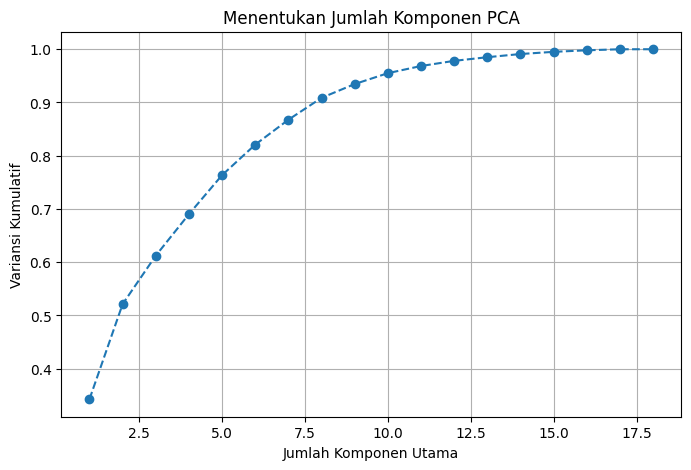

In [15]:
pca = PCA()
pca.fit(covid_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Jumlah Komponen Utama')
plt.ylabel('Variansi Kumulatif')
plt.title('Menentukan Jumlah Komponen PCA')
plt.grid()
plt.show()

In [16]:
pca = PCA(n_components=5)
covid_pca = pca.fit_transform(covid_scaled)
covid_pca_df = pd.DataFrame(covid_pca, columns=[f"PC{i+1}" for i in range(5)])
covid_pca_df

,PC1,PC2,PC3,PC4,PC5
0,-2.140591,-0.216087,3.631326,0.543357,0.284654
1,-2.137420,-0.220482,3.492889,0.442330,0.245051
2,-2.773339,-0.345579,0.252054,-0.112568,-1.238643
3,-2.134499,-0.224505,3.366691,0.350242,0.208956
4,-1.830589,1.289002,16.130348,10.716554,5.105003
...,...,...,...,...,...
24875,-0.762652,1.811508,-0.884078,0.494673,1.386720
24876,-0.838197,1.123817,-0.950236,0.365262,1.868471
24877,-0.272786,2.168996,-0.536429,-0.022341,1.187340
24878,-0.426124,1.732905,0.011332,-0.481790,1.084358


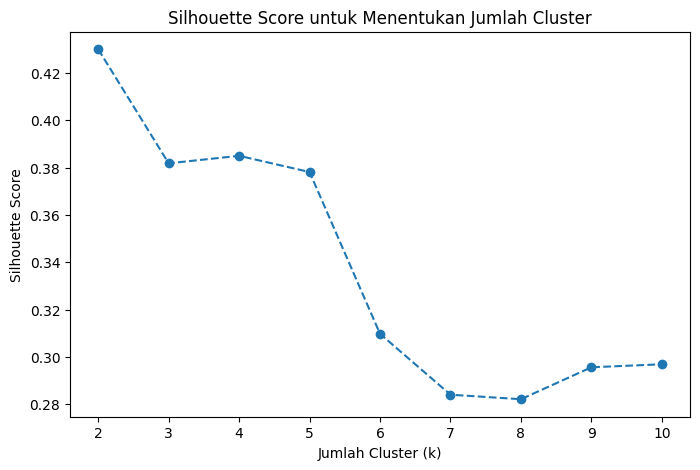

In [17]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(covid_pca_df)
    score = silhouette_score(covid_pca_df, labels)
    silhouette_scores.append(score)


plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Jumlah Cluster')
plt.xticks(range(2, 11))
plt.show()


In [18]:
# Modelling
k_optimal = 3
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
covid_pca_df['Cluster'] = kmeans_final.fit_predict(covid_pca_df)

### b. Evaluasi Model Clustering

In [19]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(covid_pca_df.iloc[:, :6], covid_pca_df["Cluster"])
print("Silhouette Score:", sil_score)

Silhouette Score: 0.42427942903570687


In [20]:
covid_scaled["Cluster"] = covid_pca_df["Cluster"]

### c. Evaluasi Hasil Clustering

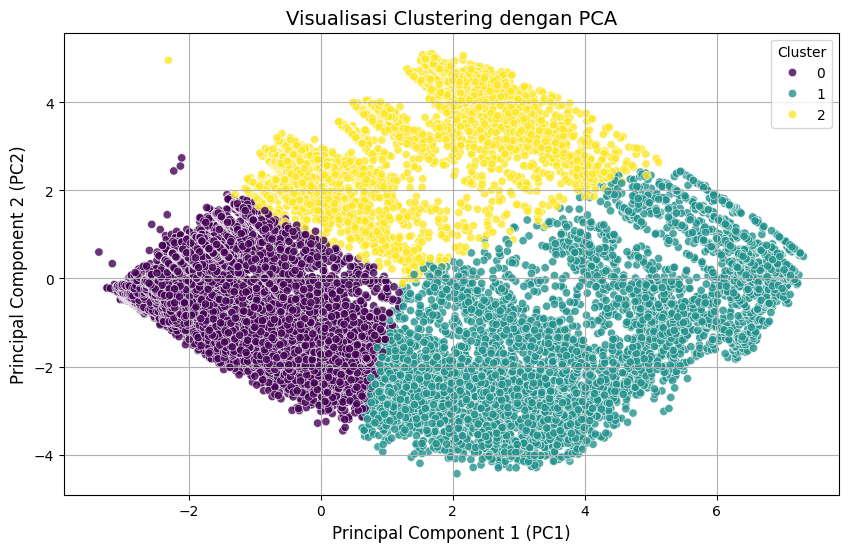

In [21]:

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=covid_pca_df.iloc[:, 0],
    y=covid_pca_df.iloc[:, 1],
    hue=covid_pca_df['Cluster'],
    palette='viridis',
    alpha=0.8
)


plt.title("Visualisasi Clustering dengan PCA", fontsize=14)
plt.xlabel("Principal Component 1 (PC1)", fontsize=12)
plt.ylabel("Principal Component 2 (PC2)", fontsize=12)
plt.legend(title="Cluster", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


### d. Analisis dan Interpretasi Hasil Cluster

In [22]:
covid_inverse = covid_scaled.copy()
numerical_cols = [col for col in covid_scaled.columns if col not in ['Island', 'Cluster']]
covid_inverse[numerical_cols] = covid_scaled[numerical_cols] * scaler.scale_[:len(numerical_cols)] + scaler.mean_[:len(numerical_cols)]

   New Cases  New Deaths  New Recovered  New Active Cases  Total Cases  \
0        2.0         0.0            0.0               2.0         41.0   
1        2.0         0.0            0.0               2.0         43.0   
2        0.0         0.0            0.0               0.0          1.0   
3        2.0         0.0            0.0               2.0         45.0   
4        1.0         0.0            0.0               1.0          2.0   

   Total Deaths  Total Recovered  Total Active Cases    Island  Population  \
0          20.0             75.0               -54.0 -1.385253    5.345298   
1          20.0             75.0               -52.0 -1.385253    5.345298   
2           0.0              1.0                 0.0  1.129774    3.222783   
3          20.0             75.0               -50.0 -1.385253    5.345298   
4           1.0             60.0               -59.0 -1.385253    8.920180   

   New Cases per Million  Total Cases per Million  New Deaths per Million  \
0        

In [23]:
# Inverse transform kolom 'Island'
covid_inverse['Island'] = label_encoder.inverse_transform(data_covid['Island'])

In [24]:
covid_inverse

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Island,Population,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Cluster
0,2.0,0.0,0.0,2.0,41.0,20.0,75.0,-54.0,Jawa,5.345298,2.032821e+06,-3.529700,3006.040499,-0.131017,1277.004067,0.140814,0.815143,1.214833,0
1,2.0,0.0,0.0,2.0,43.0,20.0,75.0,-52.0,Jawa,5.345298,2.032821e+06,-3.529323,3006.040499,-0.131017,1226.099028,0.131753,0.815143,1.214833,0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Sumatera,3.222783,1.989004e+06,-3.537292,3006.040499,-0.134227,183.106354,0.052519,-1.046865,1.214833,0
3,2.0,0.0,0.0,2.0,45.0,20.0,75.0,-50.0,Jawa,5.345298,2.032821e+06,-3.528924,3006.040499,-0.131017,1179.679014,0.123502,0.815143,1.214833,0
4,1.0,0.0,0.0,1.0,2.0,1.0,60.0,-59.0,Jawa,8.920180,1.993872e+06,-3.537544,3006.040499,-0.134192,1304.362722,3.140106,0.815143,-0.129836,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24875,12.0,0.0,0.0,12.0,61099.0,1733.0,59276.0,90.0,Sulawesi,1.835719,2.977315e+06,39.818148,3006.040499,0.888706,246.793716,0.049347,3.319543,1.214833,2
24876,37.0,0.0,0.0,37.0,52770.0,1213.0,50997.0,560.0,Sulawesi,1.696199,5.399408e+06,38.353983,3006.040499,0.666778,234.684147,0.048942,3.319543,1.214833,0
24877,13.0,0.0,3.0,10.0,104640.0,2371.0,102066.0,203.0,Sumatera,2.975995,2.563490e+06,36.224690,3006.040499,0.615226,234.011393,0.049900,3.319543,1.214833,2
24878,16.0,0.0,1.0,15.0,82198.0,3376.0,78510.0,312.0,Sumatera,4.176150,2.463685e+06,17.440790,3006.040499,0.582498,275.273627,0.047739,3.319543,1.214833,2


In [36]:
# Mengetahui Rata-rata Kasus Covid-19 berdasarkan Cluster 0
average_cases_cluster0 = covid_inverse.groupby("Cluster")["Total Cases"].mean().loc[0]
average_deaths_cluster0 = covid_inverse.groupby("Cluster")["Total Deaths"].mean().loc[0]
print("Rata-rata Kasus covid pada Cluster 0 = ", average_cases_cluster0)
print("Rata-rata Kematian Covid pada Cluster 0 = ", average_deaths_cluster0)

Rata-rata Kasus covid pada Cluster 0 =  15069.605023907334
Rata-rata Kematian Covid pada Cluster 0 =  425.2132803555795


In [38]:
# Mengetahui Rata-Rata Kasus Covid berdasarkan Cluster 1
average_cases_cluster1 = covid_inverse.groupby("Cluster")["Total Cases"].mean().loc[1]
average_deaths_cluster1 = covid_inverse.groupby("Cluster")["Total Deaths"].mean().loc[1]
print("Rata-rata Kasus covid pada Cluster 1 = ", average_cases_cluster1)
print("Rata-rata Kematian Covid pada Cluster 1 = ", average_deaths_cluster1)

Rata-rata Kasus covid pada Cluster 1 =  89647.14168917615
Rata-rata Kematian Covid pada Cluster 1 =  2705.7275709048813


In [39]:
# Mengetahui average dari kasus covid bersarkan cluster 2
average_cases_cluster2 = covid_inverse.groupby("Cluster")["Total Cases"].mean().loc[2]
average_deaths_cluster2 = covid_inverse.groupby("Cluster")["Total Deaths"].mean().loc[2]
print("Rata-rata Kasus covid pada Cluster 2 = ", average_cases_cluster2)
print("Rata-rata Kematian Covid pada Cluster 2 = ", average_deaths_cluster2)

Rata-rata Kasus covid pada Cluster 2 =  114194.78431827558
Rata-rata Kematian Covid pada Cluster 2 =  3290.5628094059407


In [49]:
# Menghitung JUmlah pulau yang paling sering muncul di Cluster 0
cluster_0 = covid_inverse[covid_inverse["Cluster"]==0]

In [50]:
island_agg = (cluster_0.groupby("Island").agg(Jumlah=('Island', 'count')).sort_values(by="Jumlah", ascending=False)
)
island_agg

,Jumlah
Island,
Sumatera,4557
Sulawesi,3249
Kalimantan,1916
Papua,1421
Nusa Tenggara,1404
Maluku,1247
Jawa,1055


In [51]:
# Menghitung JUmlah pulau yang paling sering muncul di Cluster 1
cluster_1 = covid_inverse[covid_inverse["Cluster"]==1]
island_agg_1 = (cluster_1.groupby("Island").agg(Jumlah=('Island', 'count')).sort_values(by="Jumlah", ascending=False)
)
island_agg_1

,Jumlah
Island,
Jawa,2656
Sumatera,1066
Kalimantan,667
Nusa Tenggara,369
Sulawesi,368
Papua,47
Maluku,10


In [52]:
# Menghitung JUmlah pulau yang paling sering muncul di Cluster 2
cluster_2 = covid_inverse[covid_inverse["Cluster"]==2]
island_agg_2 = (cluster_2.groupby("Island").agg(Jumlah=('Island', 'count')).sort_values(by="Jumlah", ascending=False)
)
island_agg_2

,Jumlah
Island,
Sumatera,1623
Jawa,1302
Kalimantan,1106
Nusa Tenggara,409
Sulawesi,408


1. Cluster 0 :
  - Rata-Rata Kasus Covid-19 = 15.069
  - Rata-rata Kematian akibat covid-19 = 425
  - Pulau yang paling banyak terjangkit covid-19 = Sumatera
  - Cluster ini mencakup wilayah dengan jumlah kasus Covid-19 yang paling rendah dibanding cluster lainnya. Tingkat kematian akibat Covid-19 juga relatif kecil. Sumatera menjadi pulau yang paling terdampak dalam cluster ini, meskipun jumlah kasusnya masih tergolong rendah dibandingkan dengan cluster lain.

2. Cluster 1 :
  - Rata-Rata Kasus Covid-19 = 89.920
  - Rata-Rata Kematian akibat Covid-19 = 2.705
  - Pulau yang paling banyak terjangkit covid-19 = Jawa
  - Cluster ini memiliki tingkat kasus Covid-19 lebih tinggi dibanding Cluster 0, dengan jumlah kematian yang juga meningkat. Jawa menjadi wilayah yang paling terdampak dalam cluster ini.

3. Cluster 2 :
  - Rata-Rata Kasus Covid-19 = 114.194
  - Rata-Rata Kematian akibat Covid-19 = 3.290
  - Pulau yang paling banyak terjangkit covid-19 = Sumatera
  - Cluster ini merupakan kelompok dengan angka kasus dan kematian tertinggi. Sumatera menjadi wilayah yang paling terdampak dalam cluster ini, menunjukkan bahwa beberapa daerah di Sumatera mengalami lonjakan kasus yang signifikan.

**Kesimpulan **

Terdapat 3 Clutser wilayah yang terdeampak covid-19.
Cluster 0 mencakup kasus dan kematian yang paling rendah, didominasi oleh Pulau Sumtera. Cluster 1 menunjukkan peningkatan signifikan dalam kasus dan kematian, dengan Jawa sebagai wilayah paling terdampak. Sementara itu, Cluster 2 mencatat angka tertinggi baik dalam kasus maupun kematian, dan kembali didominasi oleh Sumatera, mengindikasikan adanya lonjakan serius di beberapa daerah di pulau tersebut.



# 7. Save Data

In [ ]:
covid_inverse.to_csv('covid_inverse.csv', index=False)